In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [17]:
!pip install html5lib

In [19]:
url = "https://pmc.ncbi.nlm.nih.gov/articles/PMC8548039/"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [21]:
print(soup.prettify()[:3000])  # Show first 3000 characters

<!DOCTYPE html>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>
 403
</title>
403 Forbidden



In [23]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [25]:
from selenium import webdriver

driver = webdriver.Chrome()  # or Firefox()
driver.get("https://pmc.ncbi.nlm.nih.gov/articles/PMC8548039/table/germs-11-03-391-t002/?report=objectonly")

html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

table = soup.find("table")
rows = table.find_all("tr")
data = []

for row in rows:
    cols = row.find_all(["th", "td"])
    cols = [col.text.strip() for col in cols]
    data.append(cols)

df = pd.DataFrame(data[1:], columns=data[0])
driver.quit()

print(df.head())

     State No. of cases % of cases No. of deaths % of deaths   CFR  \
0    Lagos       57,581      35.41           439       21.43  0.76   
1      FCT       19,617      12.06           156        7.62  0.75   
2  Plateau        9,024       5.55            57        2.78  0.63   
3   Kaduna        8,914       5.48            65        3.17  0.73   
4   Rivers        6,909       4.25           100        4.88  1.45   

  No. of tests  
0      428,499  
1      242,845  
2       66,908  
3       77,538  
4      160,199  


In [27]:
df

,State,No. of cases,% of cases,No. of deaths,% of deaths,CFR,No. of tests
0,Lagos,"57,581",35.41,439,21.43,0.76,"428,499"
1,FCT,"19,617",12.06,156,7.62,0.75,"242,845"
2,Plateau,"9,024",5.55,57,2.78,0.63,"66,908"
3,Kaduna,"8,914",5.48,65,3.17,0.73,"77,538"
4,Rivers,"6,909",4.25,100,4.88,1.45,"160,199"
5,Oyo,"6,838",4.20,123,6.00,1.80,"56,286"
6,Edo,"4,875",3.00,185,9.03,3.79,"33,739"
7,Ogun,"4,617",2.84,49,2.39,1.06,"69,821"
8,Kano,"3,902",2.40,110,5.37,2.82,"91,948"
9,Ondo,"3,168",1.95,62,3.03,1.96,"23,566"


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State          37 non-null     object
 1   No. of cases   37 non-null     object
 2   % of cases     37 non-null     object
 3   No. of deaths  37 non-null     object
 4   % of deaths    37 non-null     object
 5   CFR            37 non-null     object
 6   No. of tests   37 non-null     object
dtypes: object(7)
memory usage: 2.2+ KB


In [31]:
df.describe()

,State,No. of cases,% of cases,No. of deaths,% of deaths,CFR,No. of tests
count,37,37,37,37,37,37,37
unique,37,37,37,32,32,36,37
top,Lagos,"57,581",35.41,17,0.83,3.62,"428,499"
freq,1,1,1,3,3,2,1


In [33]:
df.shape

(37, 7)

In [35]:
df.isnull().sum()

State            0
No. of cases     0
% of cases       0
No. of deaths    0
% of deaths      0
CFR              0
No. of tests     0
dtype: int64

In [37]:
# Remove commas from number strings and convert to integers
df['No. of cases'] = df['No. of cases'].str.replace(',', '').astype(int)
df['No. of deaths'] = df['No. of deaths'].str.replace(',', '').astype(int)
df['No. of tests'] = df['No. of tests'].str.replace(',', '').astype(int)

# Confirm dtype conversion
print(df[['No. of cases', 'No. of deaths', 'No. of tests']].dtypes)

No. of cases     int64
No. of deaths    int64
No. of tests     int64
dtype: object


In [41]:
df.sort_values(by='No. of cases', ascending=False).head(10)

,State,No. of cases,% of cases,No. of deaths,% of deaths,CFR,No. of tests
0,Lagos,57581,35.41,439,21.43,0.76,428499
1,FCT,19617,12.06,156,7.62,0.75,242845
2,Plateau,9024,5.55,57,2.78,0.63,66908
3,Kaduna,8914,5.48,65,3.17,0.73,77538
4,Rivers,6909,4.25,100,4.88,1.45,160199
5,Oyo,6838,4.20,123,6.00,1.80,56286
6,Edo,4875,3.00,185,9.03,3.79,33739
7,Ogun,4617,2.84,49,2.39,1.06,69821
8,Kano,3902,2.40,110,5.37,2.82,91948
9,Ondo,3168,1.95,62,3.03,1.96,23566


In [43]:
df.sort_values(by='CFR', ascending=False).head(10) 
# Top 10 States by Cases

,State,No. of cases,% of cases,No. of deaths,% of deaths,CFR,No. of tests
36,Kogi,5,0.003,2,0.10,40.00,4600
33,Cross River,366,0.22,17,0.83,4.64,6871
6,Edo,4875,3.00,185,9.03,3.79,33739
32,Kebbi,442,0.27,16,0.78,3.62,14878
30,Sokoto,774,0.48,28,1.37,3.62,18749
35,Zamfara,232,0.14,8,0.39,3.45,7392
31,Jigawa,518,0.32,16,0.78,3.09,8987
29,Bayelsa,852,0.52,26,1.27,3.05,16735
25,Adamawa,1051,0.64,32,1.56,3.04,18255
34,Yobe,313,0.19,9,0.44,2.87,10410


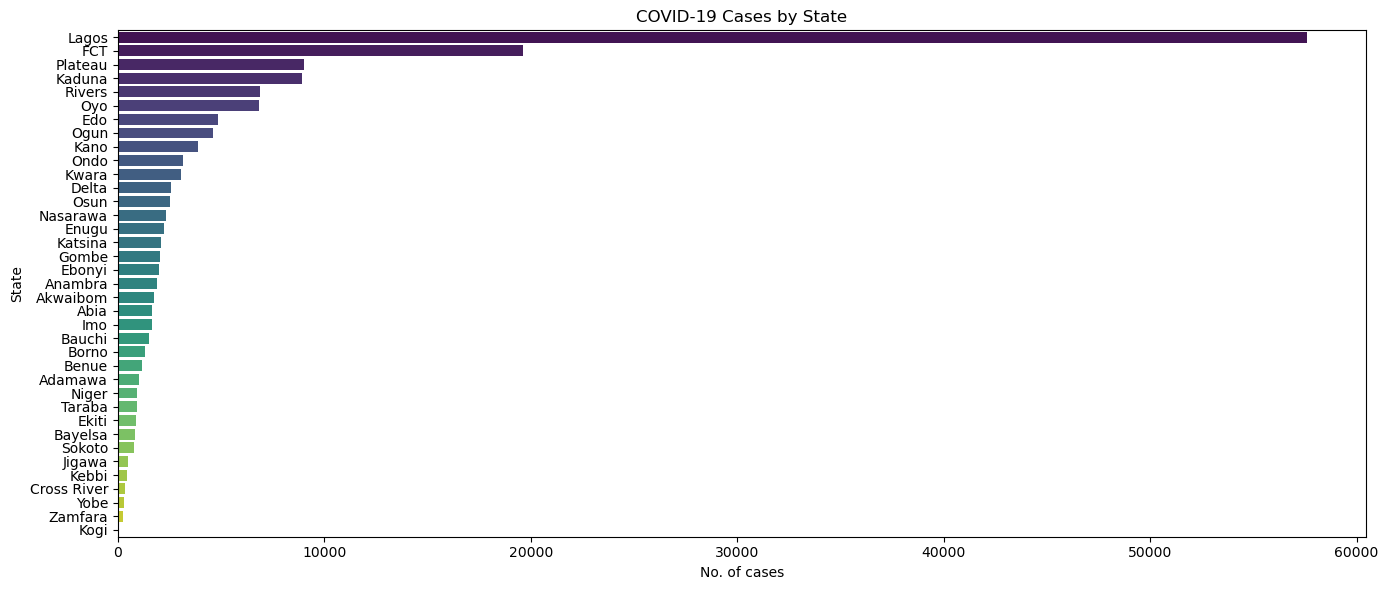

In [45]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df.sort_values(by='No. of cases', ascending=False),
            x='No. of cases', y='State', palette='viridis')
plt.title('COVID-19 Cases by State')
plt.xlabel('No. of cases')
plt.ylabel('State')
plt.tight_layout()
plt.show()
#Top 10 States by CFR

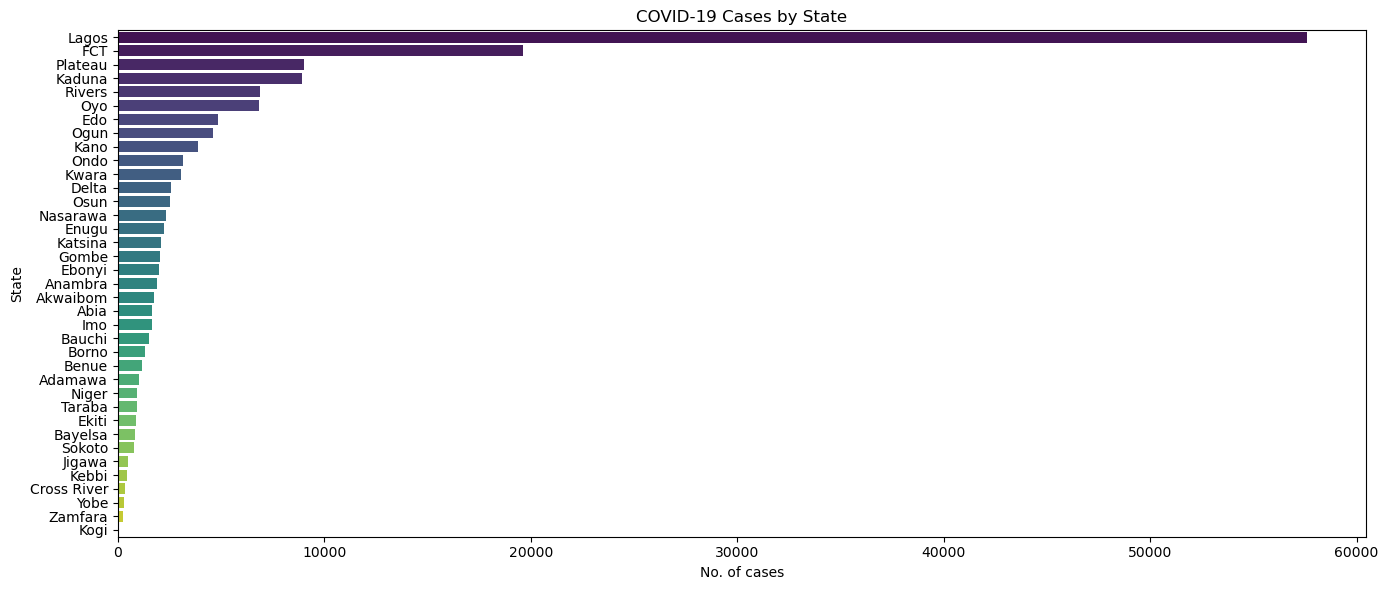

In [47]:
#Bar Chart – COVID-19 Cases by State
plt.figure(figsize=(14, 6))
sns.barplot(data=df.sort_values(by='No. of cases', ascending=False),
            x='No. of cases', y='State', palette='viridis')
plt.title('COVID-19 Cases by State')
plt.xlabel('No. of cases')
plt.ylabel('State')
plt.tight_layout()
plt.show()

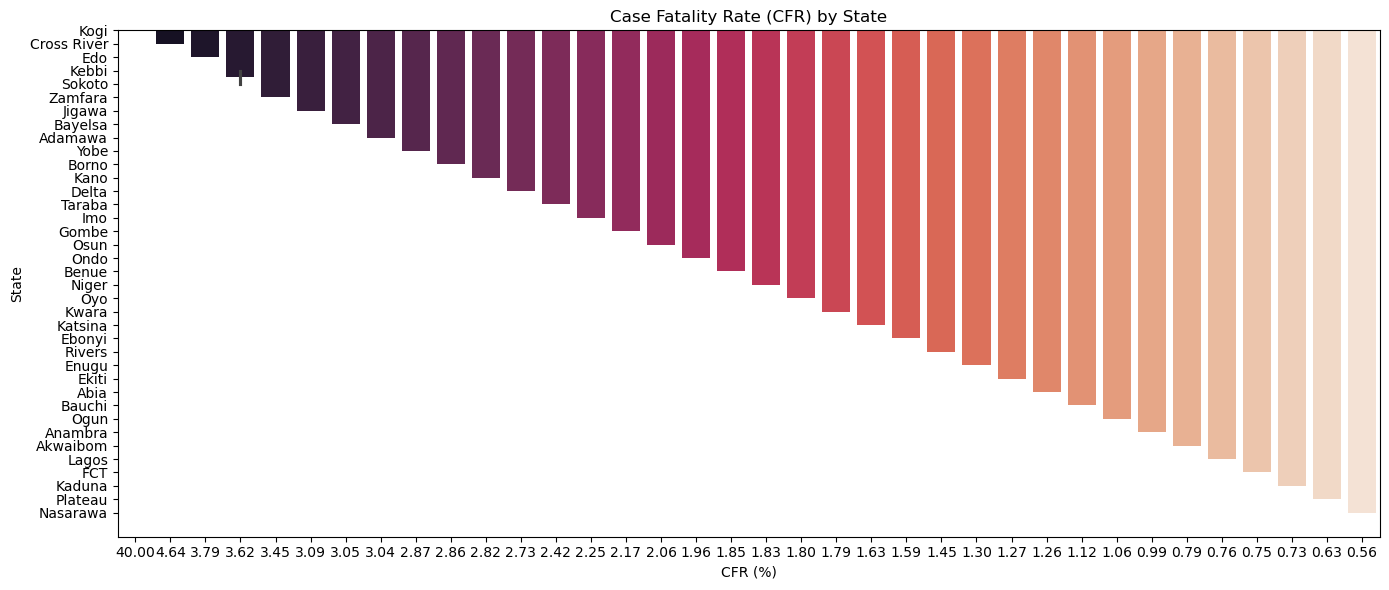

In [49]:
#Bar Chart – CFR by State
plt.figure(figsize=(14, 6))
sns.barplot(data=df.sort_values(by='CFR', ascending=False),
            x='CFR', y='State', palette='rocket')
plt.title('Case Fatality Rate (CFR) by State')
plt.xlabel('CFR (%)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [51]:
#Deaths per 1,000 Tests (New Metric)
df['Deaths per 1000 tests'] = (df['No. of deaths'] / df['No. of tests']) * 1000

df.sort_values(by='Deaths per 1000 tests', ascending=False).head()

,State,No. of cases,% of cases,No. of deaths,% of deaths,CFR,No. of tests,Deaths per 1000 tests
6,Edo,4875,3.00,185,9.03,3.79,33739,5.483269
12,Osun,2524,1.55,52,2.54,2.06,18352,2.833479
9,Ondo,3168,1.95,62,3.03,1.96,23566,2.630909
33,Cross River,366,0.22,17,0.83,4.64,6871,2.474167
10,Kwara,3078,1.89,55,2.68,1.79,23684,2.322243


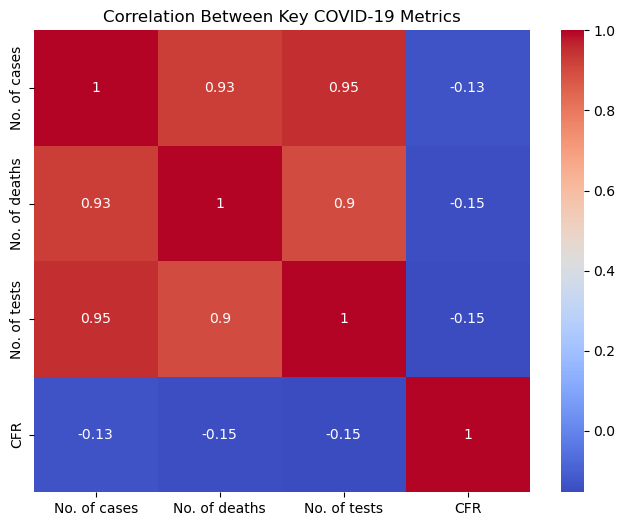

In [53]:
#Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df[['No. of cases', 'No. of deaths', 'No. of tests', 'CFR']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Key COVID-19 Metrics')
plt.show()